# ロバストMDPとNP困難

参考
* [Robust Markov Decision Processes](https://pubsonline.informs.org/doi/abs/10.1287/moor.1120.0566?journalCode=moor)
    * [途中版は読むべきではないよ．図とかが途中でかなり適当](https://optimization-online.org/wp-content/uploads/2010/05/2610.pdf)
    * ジャーナル版はかなり重要なことが書いてあるので必読

[RL_robust_rectangularity](RL_robust_rectangularity.ipynb) で説明したように，ロバストMDPは適切なUncertainty setの仮定をいれないとNP-hardになります．
これを示します．

$$
z^*=\inf _{P \in \mathcal{P}} \mathbb{E}^{P, \pi}\left[\sum_{t=0}^{\infty} \lambda^t r\left(s_t, a_t, s_{t+1}\right) \mid s_0 \sim p_0\right]
$$

---

* 表記など

以下，Uncertainty setを
$$
\mathcal{P}:=\left\{P \in[\mathcal{M}(\mathcal{S})]^{S \times A}: \exists \xi \in \Xi \text { such that } P_{s a}=p^{\xi}(\cdot \mid s, a) \quad \forall(s, a) \in \mathcal{S} \times \mathcal{A}\right\}
$$
とし，$p^{\xi}(\cdot \mid s, a):=k_{s a}+K_{s a} \xi$としました．（$k_{s a} \in \mathbb{R}^S$ and $K_{s a} \in \mathbb{R}^{S \times q}$です．）
また，$\Xi$が

$$
\Xi:=\left\{\xi \in \mathbb{R}^q: \xi^{\top} O_l \xi+o_l^{\top} \xi+\omega \geq 0 \forall l=1, \ldots, L\right\}
$$

の形式とします．（ここで$O_l \in \mathbb{S}^q$ satisfies $O_l \preceq 0$とします）．

$\Xi$は有界であり，Slater point $\bar{\xi}^{\top} O_l \bar{\xi}+o_l^{\top} \bar{\xi}+\omega>0$を持つとします．

---


これが次の0/1整数計画問題で書き換えられることを示します．

---

**0/1整数計画問題（IP問題）**

* インスタンス：
  * 行列$F \in \mathbb{Z}^{m \times n}$
  * ベクトル$g \in \mathbb{Z}^m$
  * ベクトル$c\in \mathbb{Z}^n$
  * 定数$\zeta$
* 問：$F x \leq g$ such that $c^\top x \leq \zeta$ となる0/1ベクトル$x \in\{0,1\}^n$は存在するか？

この0/1整数計画問題は，$Fx\leq g$の解が十分$0$か$1$に近ければ，その値を丸めることで解くことができます．

---

**IP問題と近似による解法**

* $0<\epsilon \leq \min \left\{\epsilon_F, \epsilon_c\right\}$
* $0<\epsilon_F<\min _i\left\{\left(\sum_j\left|F_{i j}\right|\right)^{-1}\right\}$
* $0<\boldsymbol{\epsilon}_c<\left(\sum_j\left|c_j\right|\right)^{-1}$
* $x \in([0, \epsilon] \cup[1-\epsilon, 1])^n$が$F x \leq g$と$c^\top x \leq \zeta$を満たすとする．

このとき，$y_j:=1$ if $x_j \geq 1-\epsilon$ and $y_j:=0$ otherwise とすれば，$F y \leq g$ かつ $c^\top y \leq \zeta$ for $y \in\{0,1\}^n$である．

証明は省略します．

---

以下，ロバスト評価問題を近似するのが難しいことを示します．

## ロバストMDPはNP困難

次を示します．

---

* P=NPでなければ，決定的 or 確率的な定常方策について，ロバスト評価問題を任意の相対誤差$\beta$かつ多項式時間で近似するようなアルゴリズムは存在しない．

**証明**

$F, g, c, \zeta$を固定します．また，$\zeta \leq \sum_j\left[c_j\right]^{+}$とします（これはIP問題の解がバイナリなので，一般性を損ないません）．

続いて，次のMDPを考えます（下図参照）：
* 状態集合：$\mathcal{S}=\left\{b_j, b_j^0, b_j^1: j=1, \ldots, n\right\} \cup\{c_0, \tau\}$
* 行動集合：$\mathcal{A}=\{a\}$
* 割引率：$\lambda \in (0, 1)$
* 報酬関数：下図参照
* 初期状態：$b1 \dots bn$に$1/n$の確率を振る

また，不確実集合$\mathcal{P}$は

$$
\xi \in \Xi:=\left\{\xi \in[0,1]^n: F \xi \leq g \right\}
$$

に関する全ての遷移確率とします（$\xi$は連続値を取ることに注意しましょう）．

以下，$M>\left(\lambda n \sum_j\left|c_j\right|\right) /\left(2 \epsilon^2\right)$として，$\gamma:=\lambda^2 \zeta$とします．

まず， **このIP問題への答えがYESである必要十分条件は「上のMDPにおけるロバスト収益が$\gamma$を超えない」** であることを示しましょう．

---

IP問題への答えがYESである状況を考えます．つまり，$F x \leq g$ and $c^{\top} x \leq \zeta$を満たす$x \in\{0,1\}^n$ が存在するとします．
このとき，$\xi=x \in \mathcal{P}$による報酬を考えます．

1. １ステップ目の報酬は常に０
2. $\xi$が０か１なのを踏まえて，図をよく見れば，２ステップ目の報酬も０
3. 報酬が得られるのは３ステップ目だけ

よって，$\xi$のときの期待収益は$\lambda^2 c^\top \xi$です．$\xi$が満たす制約より，
$$\lambda^2 c^\top \xi \leq \lambda^2 \zeta =\gamma$$
が成り立ちます．
ロバスト期待収益は$\xi$のうち最悪ケースを考えるので，これは$\gamma$を超えません．

---

逆に，ロバスト期待収益が$\gamma$を超えない場合を考えましょう．まず，設定したロバストMDPについて，その期待収益は$\xi$について連続です．
$\mathcal{P}$がコンパクトなので，ロバスト期待収益は何らかの$\xi^*\in \Xi$によって達成され，それは
$\xi^*\in [0, 1]^n$かつ$F\xi^* \leq g$を満たします．

ここで，何らかの$q\in \{1, \dots, n\}$について$\xi_q^* \notin([0, \epsilon] \cup[1-\epsilon, 1])$とします．このときの報酬を考えましょう．

1. １ステップ目の報酬は常に０
2. ２ステップ目は，各$q$について$2\lambda \xi^*_q (1 - \xi^*_q) M / n > \frac{2\lambda^2\xi^*_q (1 - \xi^*_q)}{2\epsilon^2}\sum_j |c_j|$
3. ３ステップ目の報酬は$\lambda^2 \sum_j c_j \geq -\lambda^2 \sum_j [-c_j]^+ $

全部合わせると，期待収益は

$$
2\lambda \xi^*_q (1 - \xi^*_q) M / n  + \lambda^2 \sum_j c_j > \lambda^2 \sum_j [c_j]^+ \geq \gamma
$$

となり，矛盾．

続いて，$\xi^* \in([0, \epsilon] \cup[1-\epsilon, 1])^n$とします．
このときの報酬は，

1. １ステップ目の報酬は常に０
2. ２ステップ目は非負
3. ３ステップ目の報酬は$\lambda^2 c^\top \xi^*$

ロバスト期待収益が$\gamma$を超えない仮定より，$\lambda^2 c^\top \xi^* \leq \gamma = \lambda^2 \zeta$です．
よって，$c^\top \xi^*\leq \zeta$です．

上で示したように，この$\xi^*$は0か1に十分近いので，$F \xi^{\prime} \leq g$ and $c^{\top} \xi^{\prime} \leq \zeta$を満たすベクトル$\xi^{\prime} \in\{0,1\}^n$が存在します．

---

さて，上で見たように，
**IP問題への答えがYESである必要十分条件は「上のMDPにおけるロバスト収益が$\gamma$を超えない」**
でした．
よって，「上のMDPにおけるロバスト収益が$\gamma$を超えるか？」を多項式時間で評価できれば，IP問題に回答することができます．
しかし，IP問題はstrongly NP-hardであることが知られています．よって，上のMDPのロバスト収益の評価はStrongly NP-hardであり，Uncertainty set$\Xi$の下ではロバストMDPを解くのはNP困難です．


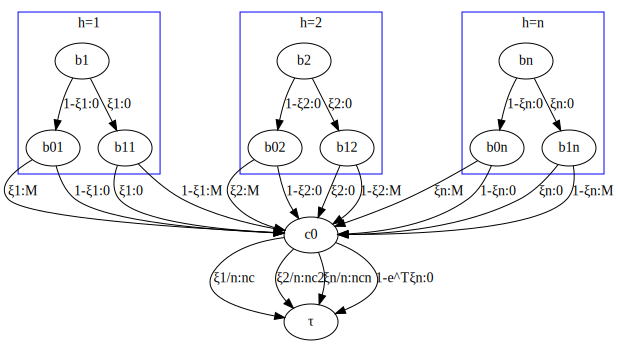

In [16]:
# 状態と遷移の関係．行動は固定されてることに注意

from graphviz import Digraph

g = Digraph('G')

with g.subgraph(name='cluster_1') as c:
    c.attr(color='blue')
    c.node('b1')
    c.node('b01')
    c.node('b11')
    c.attr(label='h=1')

with g.subgraph(name='cluster_2') as c:
    c.attr(color='blue')
    c.node('b2')
    c.node('b02')
    c.node('b12')
    c.attr(label='h=2')

with g.subgraph(name='cluster_n') as c:
    c.attr(color='blue')
    c.node('bn')
    c.node('b0n')
    c.node('b1n')
    c.attr(label='h=n')

g.node("c0")
g.node("τ")

g.edge("b1", "b01", label="1-ξ1:0")
g.edge("b1", "b11", label="ξ1:0")
g.edge("b2", "b02", label="1-ξ2:0")
g.edge("b2", "b12", label="ξ2:0")
g.edge("bn", "b0n", label="1-ξn:0")
g.edge("bn", "b1n", label="ξn:0")

g.edge("b01", "c0", label="ξ1:M")
g.edge("b11", "c0", label="ξ1:0")
g.edge("b02", "c0", label="ξ2:M")
g.edge("b12", "c0", label="ξ2:0")
g.edge("b0n", "c0", label="ξn:M")
g.edge("b1n", "c0", label="ξn:0")

g.edge("b01", "c0", label="1-ξ1:0")
g.edge("b11", "c0", label="1-ξ1:M")
g.edge("b02", "c0", label="1-ξ2:0")
g.edge("b12", "c0", label="1-ξ2:M")
g.edge("b0n", "c0", label="1-ξn:0")
g.edge("b1n", "c0", label="1-ξn:M")

g.edge("c0", "τ", label="ξ1/n:nc")
g.edge("c0", "τ", label="ξ2/n:nc2")
g.edge("c0", "τ", label="ξn/n:ncn")
g.edge("c0", "τ", label="1-e^Tξn:0")

g

このようにNon-rectangularなロバストMDPはNP困難になりえます．

一方で，$s$-rectangularなロバストMDPについては多項式時間で解けることが知られています．
これは
* $s$-rectangularなロバストMDPは２プレイヤー確率ゲームと同じ（[Robust dynamic programming](http://www.corc.ieor.columbia.edu/reports/techreports/tr-2002-07.pdf)）
* ２プレイヤー確率ゲームは多項式時間で解ける（[Strategy iteration is strongly polynomial for 2-player turn-based stochastic games with a constant discount factor](https://arxiv.org/abs/1008.0530)）

ことからわかります．
しかし，non-rectangularの場合は確率ゲームとの明確なコネクションがあるかはわかりません．
